###Problem Statement:
Machine Learning model to predict house price using linear regression

##Importing dependencies :

*   Numpy
*   Pandas
*   Matplotlib
*   Seaborn





In [167]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns



#Importing dataset and train_test_split from sklearn

In [168]:
import sklearn.datasets
import sklearn.linear_model
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error,r2_score





#Importing dataset



In [169]:
house_price_dataset=pd.read_csv(r"Housing.csv")
print(house_price_dataset)



        price  area  bedrooms  bathrooms  stories mainroad guestroom basement  \
0    13300000  7420         4          2        3      yes        no       no   
1    12250000  8960         4          4        4      yes        no       no   
2    12250000  9960         3          2        2      yes        no      yes   
3    12215000  7500         4          2        2      yes        no      yes   
4    11410000  7420         4          1        2      yes       yes      yes   
..        ...   ...       ...        ...      ...      ...       ...      ...   
540   1820000  3000         2          1        1      yes        no      yes   
541   1767150  2400         3          1        1       no        no       no   
542   1750000  3620         2          1        1      yes        no       no   
543   1750000  2910         3          1        1       no        no       no   
544   1750000  3850         3          1        2      yes        no       no   

    hotwaterheating aircond

#Data Inspection


In [170]:
house_price_dataset.shape



(545, 13)

In [171]:
house_price_dataset.info()



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   price             545 non-null    int64 
 1   area              545 non-null    int64 
 2   bedrooms          545 non-null    int64 
 3   bathrooms         545 non-null    int64 
 4   stories           545 non-null    int64 
 5   mainroad          545 non-null    object
 6   guestroom         545 non-null    object
 7   basement          545 non-null    object
 8   hotwaterheating   545 non-null    object
 9   airconditioning   545 non-null    object
 10  parking           545 non-null    int64 
 11  prefarea          545 non-null    object
 12  furnishingstatus  545 non-null    object
dtypes: int64(6), object(7)
memory usage: 55.5+ KB


In [172]:
house_price_dataset.describe()



,price,area,bedrooms,bathrooms,stories,parking
count,5.450000e+02,545.000000,545.000000,545.000000,545.000000,545.000000
mean,4.766729e+06,5150.541284,2.965138,1.286239,1.805505,0.693578
std,1.870440e+06,2170.141023,0.738064,0.502470,0.867492,0.861586
min,1.750000e+06,1650.000000,1.000000,1.000000,1.000000,0.000000
25%,3.430000e+06,3600.000000,2.000000,1.000000,1.000000,0.000000
50%,4.340000e+06,4600.000000,3.000000,1.000000,2.000000,0.000000
75%,5.740000e+06,6360.000000,3.000000,2.000000,2.000000,1.000000
max,1.330000e+07,16200.000000,6.000000,4.000000,4.000000,3.000000


#Data Cleaning



In [173]:
# Checking Null values
house_price_dataset.isnull().sum()*100/house_price_dataset.shape[0]
# There are no NULL values in the dataset, hence it is clean.



price               0.0
area                0.0
bedrooms            0.0
bathrooms           0.0
stories             0.0
mainroad            0.0
guestroom           0.0
basement            0.0
hotwaterheating     0.0
airconditioning     0.0
parking             0.0
prefarea            0.0
furnishingstatus    0.0
dtype: float64

#Data Preparation

In [174]:
varlist =  ['mainroad', 'guestroom', 'basement', 'hotwaterheating', 'airconditioning', 'prefarea']

# Defining the map function
def binary_map(x):
    return x.map({'yes': 1, "no": 0})

# Applying the function to the housing list
house_price_dataset[varlist] = house_price_dataset[varlist].apply(binary_map)

In [175]:
# Check the housing dataframe now

house_price_dataset.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,1,0,0,0,1,2,1,furnished
1,12250000,8960,4,4,4,1,0,0,0,1,3,0,furnished
2,12250000,9960,3,2,2,1,0,1,0,0,2,1,semi-furnished
3,12215000,7500,4,2,2,1,0,1,0,1,3,1,furnished
4,11410000,7420,4,1,2,1,1,1,0,1,2,0,furnished


#Dummy Variables

The variable furnishingstatus has three levels. We need to convert these levels into integer as well.

For this, we will use something called dummy variables.

In [176]:
# Get the dummy variables for the feature 'furnishingstatus' and store it in a new variable - 'status'
status = pd.get_dummies(house_price_dataset['furnishingstatus'])

In [177]:
# Check what the dataset 'status' looks like
status.head()

,furnished,semi-furnished,unfurnished
0,1,0,0
1,1,0,0
2,0,1,0
3,1,0,0
4,1,0,0


Now, we don't need three columns. we can drop the furnished column, as the type of furnishing can be identified with just the last two columns where —



*   00 will correspond to furnished
*   01 will correspond to unfurnished
*   10 will correspond to semi-furnished





In [178]:
# Let's drop the first column from status df using 'drop_first = True'

status = pd.get_dummies(house_price_dataset['furnishingstatus'], drop_first = True)

In [179]:
# Add the results to the original housing dataframe

housing = pd.concat([house_price_dataset, status], axis = 1)

In [180]:
# Now let's see the head of our dataframe.

housing.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus,semi-furnished,unfurnished
0,13300000,7420,4,2,3,1,0,0,0,1,2,1,furnished,0,0
1,12250000,8960,4,4,4,1,0,0,0,1,3,0,furnished,0,0
2,12250000,9960,3,2,2,1,0,1,0,0,2,1,semi-furnished,1,0
3,12215000,7500,4,2,2,1,0,1,0,1,3,1,furnished,0,0
4,11410000,7420,4,1,2,1,1,1,0,1,2,0,furnished,0,0


In [181]:
# Drop 'furnishingstatus' as we have created the dummies for it

housing.drop(['furnishingstatus'], axis = 1, inplace = True)

In [182]:
housing.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,semi-furnished,unfurnished
0,13300000,7420,4,2,3,1,0,0,0,1,2,1,0,0
1,12250000,8960,4,4,4,1,0,0,0,1,3,0,0,0
2,12250000,9960,3,2,2,1,0,1,0,0,2,1,1,0
3,12215000,7500,4,2,2,1,0,1,0,1,3,1,0,0
4,11410000,7420,4,1,2,1,1,1,0,1,2,0,0,0


#Splitting the Data into Training and Testing Sets

In [183]:
from sklearn.model_selection import train_test_split

# We specify this so that the train and test data set always have the same rows, respectively
np.random.seed(0)
df_train, df_test = train_test_split(housing, train_size = 0.7, test_size = 0.3, random_state = 100)

In [184]:
print(df_train.columns)
print(df_train.shape)

Index(['price', 'area', 'bedrooms', 'bathrooms', 'stories', 'mainroad',
       'guestroom', 'basement', 'hotwaterheating', 'airconditioning',
       'parking', 'prefarea', 'semi-furnished', 'unfurnished'],
      dtype='object')
(381, 14)


In [185]:
print(df_test.columns)
print(df_test.shape)

Index(['price', 'area', 'bedrooms', 'bathrooms', 'stories', 'mainroad',
       'guestroom', 'basement', 'hotwaterheating', 'airconditioning',
       'parking', 'prefarea', 'semi-furnished', 'unfurnished'],
      dtype='object')
(164, 14)


#Rescaling the Features
As we saw in the demonstration for Simple Linear Regression, scaling doesn't impact your model. Here we can see that except for area, all the columns have small integer values. So it is extremely important to rescale the variables so that they have a comparable scale. If we don't have comparable scales, then some of the coefficients as obtained by fitting the regression model might be very large or very small as compared to the other coefficients. This might become very annoying at the time of model evaluation. So it is advised to use standardization or normalization so that the units of the coefficients obtained are all on the same scale. As we know, there are two common ways of rescaling:


Min-Max scaling
Standardisation (mean-0, sigma-1)

This time, we will use MinMax scaling.

In [186]:
from sklearn.preprocessing import MinMaxScaler

In [187]:
scaler = MinMaxScaler()

In [188]:
# Apply scaler() to all the columns except the 'yes-no' and 'dummy' variables
num_vars = ['area', 'bedrooms', 'bathrooms', 'stories', 'parking','price']

df_train[num_vars] = scaler.fit_transform(df_train[num_vars])

In [189]:
print(df_test.columns)
print(df_train.columns)

Index(['price', 'area', 'bedrooms', 'bathrooms', 'stories', 'mainroad',
       'guestroom', 'basement', 'hotwaterheating', 'airconditioning',
       'parking', 'prefarea', 'semi-furnished', 'unfurnished'],
      dtype='object')
Index(['price', 'area', 'bedrooms', 'bathrooms', 'stories', 'mainroad',
       'guestroom', 'basement', 'hotwaterheating', 'airconditioning',
       'parking', 'prefarea', 'semi-furnished', 'unfurnished'],
      dtype='object')


In [190]:
df_train.describe()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,semi-furnished,unfurnished
count,381.000000,381.000000,381.000000,381.000000,381.000000,381.000000,381.000000,381.000000,381.000000,381.000000,381.000000,381.000000,381.000000,381.000000
mean,0.260333,0.288710,0.386352,0.136483,0.268591,0.855643,0.170604,0.351706,0.052493,0.299213,0.242345,0.233596,0.414698,0.325459
std,0.157607,0.181420,0.147336,0.237325,0.295001,0.351913,0.376657,0.478131,0.223313,0.458515,0.285933,0.423674,0.493318,0.469162
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.151515,0.155227,0.200000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.221212,0.234424,0.400000,0.000000,0.333333,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.345455,0.398099,0.400000,0.500000,0.333333,1.000000,0.000000,1.000000,0.000000,1.000000,0.333333,0.000000,1.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


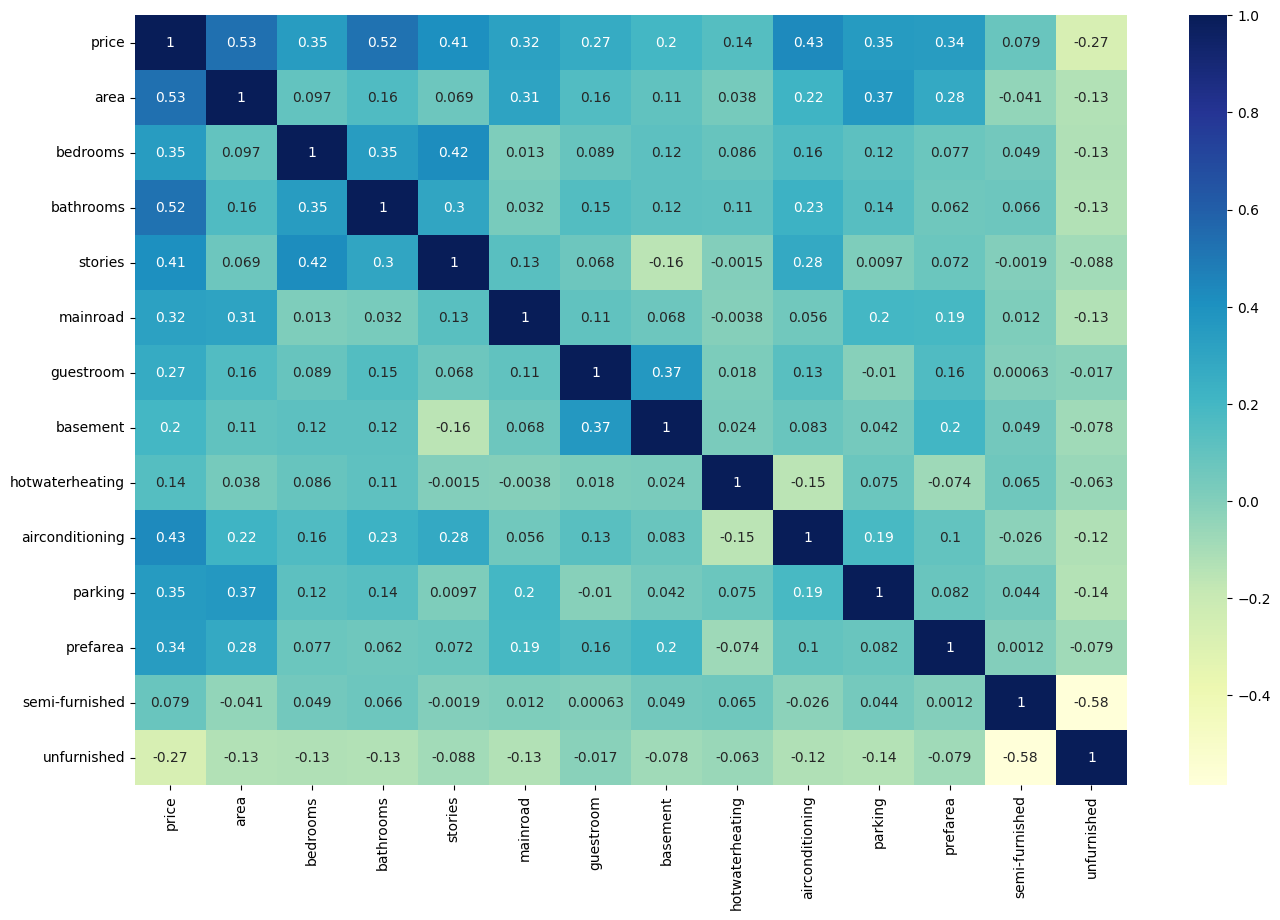

In [191]:
# Let's check the correlation coefficients to see which variables are highly correlated

plt.figure(figsize = (16, 10))
sns.heatmap(df_train.corr(), annot = True, cmap="YlGnBu")
plt.show()

#Dividing into X and Y sets for the model building

In [192]:
y_train = df_train.pop('price')
X_train = df_train
y_test  = df_test.pop('price')
X_test  = df_test

#Model Building

This time, we will be using the LinearRegression function from SciKit Learn for its compatibility with RFE (which is a utility from sklearn)

In [193]:
# Importing r2 score, mean_square_error and LinearRegression
from sklearn.linear_model import LinearRegression

In [194]:
regressor=LinearRegression()

#Fitting trained data into our model

In [195]:
regressor.fit(X_train,y_train)

LinearRegression()

# Make a prediction of tested data

In [196]:
ypre=regressor.predict(X_test)
print(ypre)

[ 676.50987679 1408.94956237 2410.39099578 1249.14093827 1162.3175928
 1014.31685919 1535.85544624 1535.57300363 1596.1443506  1535.44249195
 1323.91612855 1338.39199903  654.86337686 3661.45051752 1205.99780166
 1036.05711203 1761.162752    956.93835775 1537.81262499  869.01767516
 1056.640339    962.61741429  742.75226302 1408.44544449  718.54944441
  747.90253335 1059.18710574 1291.58323323 1704.59237162 1408.79049473
  469.89979892  995.65974466 1115.08409298  856.71953511 1418.05961918
 1183.38024565  854.97523148  929.77763629  852.31352834 1056.64341858
  831.17471706  775.4123771  1549.60888368  563.78002344  657.53692393
 1267.81526382 1291.30387931  845.63369628 1056.45013404 1965.48755335
  683.25273739 1362.11079585 1244.55964121 1643.66961782 1491.12866125
 1361.63164051 1502.59666243  948.47297937  821.75466761 1267.849305
  399.51554523  739.83027915 1291.71512125 1549.79254034  803.17986217
 1742.57069285 2685.35884652 1056.39877208  387.75352166 1268.07345096
  760.782

# Find mean_square_error and r2score

In [197]:
mserror=mean_squared_error(y_test,ypre)
r2score=r2_score(y_test,ypre)
print("Mean square error is : ",mserror)
print("r2 score is : ", r2score)

Mean square error is :  26854129704706.938
r2 score is :  -5.840052655149859


#Printing y_test v/s ypre

Text(0, 0.5, 'y_pred')

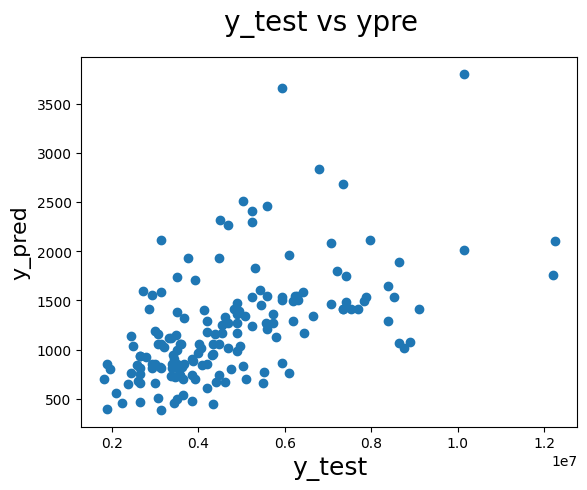

In [198]:
fig = plt.figure()
plt.scatter(y_test,ypre)
fig.suptitle('y_test vs ypre', fontsize=20)              # Plot heading
plt.xlabel('y_test', fontsize=18)                          # X-label
plt.ylabel('y_pred', fontsize=16)